# **Decision Tree Algorithm**

## **Introduction**
A **Decision Tree** is a supervised learning algorithm used for both **classification** and **regression** tasks. It works like a flowchart where each internal node represents a decision based on a feature, branches represent possible outcomes, and leaf nodes indicate the final prediction.

Decision Trees attempt to **split the dataset** into smaller groups at each step based on the feature that provides the most information gain or reduces impurity the most. The goal is to create **pure nodes** where all data points belong to the same class.

---

## **How Decision Trees Work (Step-by-Step)**

1. **Select the Best Feature to Split**  
   - The algorithm chooses a feature that best separates the data using:
     - **Gini Impurity**: Measures how mixed the classes are in a node.
     - **Entropy (Information Gain)**: Measures the reduction in uncertainty.

2. **Split the Data**  
   - The dataset is divided into subsets based on the chosen feature’s values.

3. **Repeat for Each Subset**  
   - The process continues recursively, creating further splits until:
     - Each node is pure (contains only one class).
     - A predefined stopping criterion is met (e.g., max depth, min samples per leaf).

4. **Make Predictions**  
   - For a new data point, follow the tree’s path based on feature values until reaching a leaf node, which gives the final prediction.


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "../Datasets/Titanic_dataset_train.csv"
df = pd.read_csv(file_path)

# Fill missing Age with median
df["Age"] = df["Age"].fillna(df["Age"].median())

# Fill missing Embarked with mode
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

# Drop Cabin column (too many missing values)
df = df.drop(columns=["Cabin"])

# Convert 'Sex' column to numeric
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

# One-hot encode 'Embarked' column
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,True


## Step 2: Splitting the Dataset
Split features and label columns and then split samples for Train and Test sets.

In [18]:
from sklearn.model_selection import train_test_split

# Select features and target variable
features = ["Pclass", "Sex", "Age", "Fare", "SibSp", "Parch", "Embarked_Q", "Embarked_S"]
X = df[features]
y = df["Survived"]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((712, 8), (179, 8))

## Step 3: Train the Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train the model
dt.fit(X_train, y_train)

# Predict on test set
y_pred_dt = dt.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print("Classification Report:\n", report_dt)


Decision Tree Accuracy: 0.7989
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.83      0.65      0.73        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.78       179
weighted avg       0.80      0.80      0.79       179



In [15]:
# Load the dataset
file_path = "../Datasets/Titanic_dataset_train.csv"
df = pd.read_csv(file_path)

# Fill missing Age with median
# Fill missing Embarked with mode
# Drop Cabin column (too many missing values)
# Convert 'Sex' column to numeric
# One-hot encode 'Embarked' column


# Select features and target variable
features = ["Pclass", "Sex", "Age", "Fare", "SibSp", "Parch", "Cabin", "Embarked"]
X = df[features]
y = df["Survived"]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)
df.head()

(712, 8) (179, 8)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print("Classification Report:\n", report_rf)


Random Forest Accuracy: 0.8101
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.82      0.69      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



Decision Tree Accuracy: 0.7989
Random Forest Accuracy: 0.8101


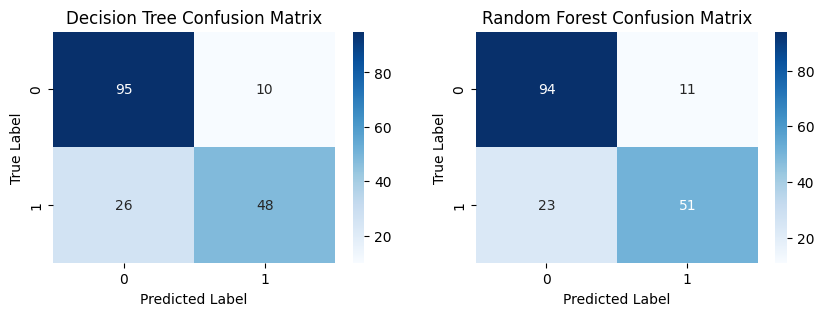

In [22]:

from sklearn.metrics import confusion_matrix

# Print accuracy results
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

# Confusion matrices
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
models = ["Decision Tree", "Random Forest"]
conf_matrices = [conf_matrix_dt, conf_matrix_rf]

for ax, model, conf_matrix in zip(axes, models, conf_matrices):
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'{model} Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

plt.show()

# **Key Parameters in Decision Tree & Random Forest**

Understanding the most important parameters in **Decision Tree** and **Random Forest** helps in tuning them for better performance.

---

## **1. Important Parameters in Decision Tree**
A **Decision Tree** builds a predictive model by splitting the dataset based on the most informative features.

### **1.1 `max_depth` (Controls Tree Depth)**
- Limits how deep the tree can grow.
- **Higher depth → More complex model, risk of overfitting.**
- **Lower depth → Simpler model, risk of underfitting.**

```python
DecisionTreeClassifier(max_depth=5)
```

---

### **1.2 `criterion` (Splitting Criterion)**
- Defines how the tree decides where to split.
- Options:
  - `"gini"` → Measures impurity (default).
  - `"entropy"` → Uses Information Gain.

```python
DecisionTreeClassifier(criterion="entropy")
```

---

### **1.3 `min_samples_split` (Minimum Samples to Split a Node)**
- Minimum number of samples required to **split** an internal node.
- Higher values reduce overfitting.

```python
DecisionTreeClassifier(min_samples_split=10)
```

---

## **2. Important Parameters in Random Forest**
A **Random Forest** is an ensemble of multiple Decision Trees, improving accuracy and reducing overfitting.

### **2.1 `n_estimators` (Number of Trees)**
- Defines the number of trees in the Random Forest.
- More trees = More stable predictions, but increases training time.

```python
RandomForestClassifier(n_estimators=100)
```

---

### **2.2 `max_depth` (Depth of Each Tree)**
- Controls how deep individual trees grow.
- Helps prevent overfitting.

```python
RandomForestClassifier(max_depth=7)
```

---

### **2.3 `max_features` (Feature Selection at Each Split)**
- Controls how many features are considered at each split.
- Common values:
  - `"sqrt"` → Uses `sqrt(n_features)`, default for classification.
  - `"log2"` → Uses `log2(n_features)`.

```python
RandomForestClassifier(max_features="sqrt")
```

---

## **3. Conclusion**
- **Decision Trees** are prone to **overfitting**, so `max_depth` and `min_samples_split` are critical.
- **Random Forest** reduces overfitting but requires `n_estimators` and `max_features` tuning.
- Adjusting these parameters improves model performance.

---


## Hyperparameter Tuning


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 200}


## Decision Tree and Random Forest for Regression

In [24]:
df = pd.read_csv('../Datasets/student_performance_clean.csv')
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
X = df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']]
y = df['Performance Index']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (7968, 5)
Testing set size: (1993, 5)


Decision Tree Regression MSE: 19.0465, R² Score: 0.9486
Random Forest Regression MSE: 14.1853, R² Score: 0.9617


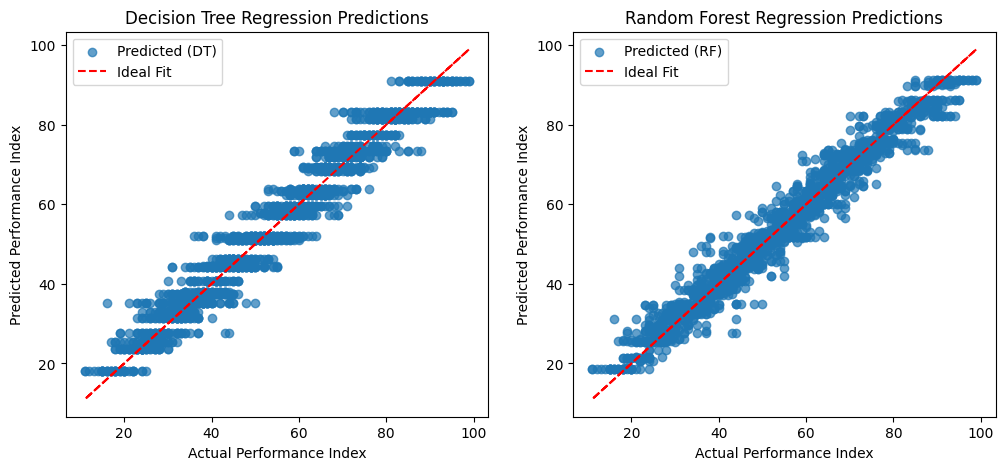

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Initialize Decision Tree Regressor
dt_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)

# Initialize Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Evaluate models
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print results
print(f"Decision Tree Regression MSE: {mse_dt:.4f}, R² Score: {r2_dt:.4f}")
print(f"Random Forest Regression MSE: {mse_rf:.4f}, R² Score: {r2_rf:.4f}")

# Plot predictions vs actual values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_dt, alpha=0.7, label='Predicted (DT)')
plt.plot(y_test, y_test, color='red', linestyle='dashed', label='Ideal Fit')
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Decision Tree Regression Predictions")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.7, label='Predicted (RF)')
plt.plot(y_test, y_test, color='red', linestyle='dashed', label='Ideal Fit')
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Random Forest Regression Predictions")
plt.legend()

plt.show()
